# DGL der Biegung am Einfeldträger 

Dieses Jupyter Notebook enthält eine Python Implementierung der Differentialgleichung am Einfeldträger. Die Differentialgleichung der Biegelinie für einen Einfeldträger ergibt sich aus den Grundlagen der Festigkeitslehre und der Elastizitätstheorie. 

![System der Biegelinie](system.png)[3]

Allgemeinge Differentialgleichung der Biegelinie
$$
E \cdot I \cdot \frac{d^4w(x)}{dx^4} = q(x)
$$

$𝐸$: Elastizitätsmodul des Materials (Materialeigenschaft, die die Steifigkeit beschreibt).  
$𝐼$: Flächenträgheitsmoment des Querschnitts (Geometrieeigenschaft des Trägers).  
$𝑤(𝑥)$: Durchbiegung des Trägers in Abhängigkeit von der Stelle $𝑥$.  
$𝑞(𝑥)$: Verteilte Streckenlast in $N/m$ entlang des Trägers.  


## Verformung und Schnittgrößen 


Biegemoment $M(x) = -E \cdot I \cdot \frac{d^2w(x)}{dx^2}$

Querkraft $V(x) = \frac{dM(x)}{dx} = -E \cdot I \cdot \frac{d^3w(x)}{dx^3}$

Belastung $q(x) = \frac{dV(x)}{dx} = -E \cdot I \cdot \frac{d^4w(x)}{dx^4}$


Um nun die Durchbiegung $w(x)$ zu finden, integrieren wir die Gleichung viermal:

$
\frac{d^4 w(x)}{dx^4} = \frac{q(x)}{-E \cdot I}
$

Dabei werden die Konstanten durch Randbedingungen oder spezielle Annahmen (z. B. Null-Durchbiegung oder Null-Scherkraft am Ende des Balkens) bestimmt.


Wenn wir eine spezifische Form für $ q(x)$ annehmen (z. B. $ q(x) = q_0 $, eine konstante Belastung), erhalten wir eine Lösung für $ w(x) $:

$w(x) = \frac{q_0}{24 \cdot E \cdot I} \cdot (x^4 - 2 \cdot L \cdot x^3 + L^3 \cdot x)$


#### Zusammenfassung der Schritte

1. Starten mit der Differentialgleichung für $ q(x) $, die mit den vierten Ableitungen von $ w(x) $ verknüpft ist.
2. Integrieren der Gleichung, um die Durchbiegung $ w(x) $ zu bestimmen.
3. Bestimmen der Konstanten durch Randbedingungen (z. B. $ w(0) = 0$ und $w(L) = 0$ bei einer festen Einspannung).

Durchbiegung $w(x) = \frac{q_0}{24 \cdot E \cdot I} \cdot (x^4 - 2 \cdot L \cdot x^3 + L^3 \cdot x)$

##  Programmierung und Darstellung

Um die Durchbiegung $w(x)$ eines Balkens unter einer verteilten Last $q(x)$ zu berechnen, implementieren wir die vierfache Integration der entsprechenden Differentialgleichung in Python. Dies ermöglicht die Bestimmung der Durchbiegung für verschiedene Belastungsprofile und Randbedingungen.


### Import von benötigten Abhängigkeiten/Bibliotheken (numpy, sympy, matplotlib)  
Falls nicht im System installiert muss zuvor im Terminal über die Paketverwaltung PIP `pip install numpy`, `pip install sympy`, `pip install matplotlib` oder alternativ über conda ausgeführt werden (siehe https://pypi.org/).

In [3]:
# Install a conda package in the current Jupyter kernel
import sys
!conda install --yes --prefix {sys.prefix} sympy
!conda install --yes --prefix {sys.prefix} numpy
!conda install --yes --prefix {sys.prefix}matplotlib

Channels:
 - defaults
 - conda-forge
Platform: win-64
Solving environment: ...working... done

# All requested packages already installed.





==> WARNING: A newer version of conda exists. <==
    current version: 24.7.1
    latest version: 24.11.2

Please update conda by running

    $ conda update -n base -c conda-forge conda




Channels:
 - defaults
 - conda-forge
Platform: win-64
Solving environment: ...working... done

# All requested packages already installed.





==> WARNING: A newer version of conda exists. <==
    current version: 24.7.1
    latest version: 24.11.2

Please update conda by running

    $ conda update -n base -c conda-forge conda



EnvironmentLocationNotFound: Not a conda environment: \\?\C:\Users\Hagedorn\AppData\Roaming\jupyterlab-desktop\jlab_servermatplotlib



In [38]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

### Definition der Symbole und Variablen

In [26]:
x, L, E, I, q0 = sp.symbols('x L E I q0')

Beispiel: Gleichmäßig verteilte Last $q(x) = q0$

In [6]:
q = q0 # Konstante Streckenlast

In [ ]:
#q = q0 * (1 - (x / L)*2)  # Quadratische Streckenlast
#q = q0 * (1 - x / L) # Dreieckslast

Differentialgleichung für $w(x)$

In [28]:
w = sp.Function('w')(x)
equation = sp.Eq(E * I * w.diff(x, 4), q)
print("Differentialgleichung:")
display(equation)

Differentialgleichung:


Eq(E*I*Derivative(w(x), (x, 4)), q0)

### Lösung der Differentialgleichung   
Vierfache Integration der Differentialgleichung unter Berücksichtigung der Randbedingungen für einen Einfeldträger $(w(0) = 0, w(L) = 0, w'(0) = 0, w'(L) = 0)$  
Durchbiegung und Neigung fixiert
![System der Biegelinie](system.png)

In [8]:
C1, C2, C3, C4 = sp.symbols('C1 C2 C3 C4')
constants = [C1, C2, C3, C4]

Vierfache Integration der Differentialgleichung nach Umstellung $\frac{d^4w(x)}{dx^4} = \frac{q}{(E * I)}$

In [9]:
w1 = sp.integrate(q / (E * I), x) + C1
w2 = sp.integrate(w1, x) + C2 
w3 = sp.integrate(w2, x) + C3 
w4 = sp.integrate(w3, x) + C4 
display(w4)

C1*x**3/6 + C2*x**2/2 + C3*x + C4 + q0*x**4/(24*E*I)

Anwendung der Randbedingungen

In [10]:
boundary_conditions = [
    sp.Eq(w4.subs(x, 0), 0),  # w(0) = 0
    sp.Eq(w4.subs(x, L), 0),  # w(L) = 0
    sp.Eq(w4.diff(x).subs(x, 0), 0),  # w'(0) = 0
    sp.Eq(w4.diff(x).subs(x, L), 0),  # w'(L) = 0
]
solutions = sp.solve(boundary_conditions, constants)


Lösung der Durchbiegung

In [29]:
w4 = w4.subs(solutions)
print("Lösung für die Durchbiegung w(x):")
display(w4)

Lösung für die Durchbiegung w(x):


L**2*q0*x**2/(24*E*I) - L*q0*x**3/(12*E*I) + q0*x**4/(24*E*I)

### Ableitungen bestimmen
Biegemoment

In [30]:
M = -E * I * sp.diff(w4, x, 2)
print("Biegemoment M(x):")
display(M)


Biegemoment M(x):


-q0*(L**2 - 6*L*x + 6*x**2)/12

Querkraft

In [31]:
V = sp.diff(M, x)
print("Querkraft V(x):")
display(V)

Querkraft V(x):


-q0*(-6*L + 12*x)/12

Belastung (Probe)

In [32]:
q_calculated = sp.diff(V, x)
print("Belastung q(x):")
display(q_calculated)

Belastung q(x):


-q0

### Visualisierung der Ergebnisse

Parameterwerte festlegen für Beispiel

In [15]:
E_val = 2.1e11  # Elastizitätsmodul Baustahl [Pa] nach [1]
I_val = 8.69e-6  # Flächenträgheitsmoment [m^4] nach [1] für IPE 160
q0_val = 5000  # Gleichmäßig verteilte Last [N/m]
L_val = 10  # Länge des Trägers [m]

Funktionen numerisch auswerten

In [33]:
w_lambdified = sp.lambdify(x, w4.subs({E: E_val, I: I_val, q0: q0_val, L: L_val}), 'numpy')
M_lambdified = sp.lambdify(x, M.subs({E: E_val, I: I_val, q0: q0_val, L: L_val}), 'numpy')
V_lambdified = sp.lambdify(x, V.subs({E: E_val, I: I_val, q0: q0_val, L: L_val}), 'numpy')


 x-Werte generieren

In [34]:
x_vals = np.linspace(0, L_val, 500)
w_vals = w_lambdified(x_vals)
M_vals = M_lambdified(x_vals)
V_vals = V_lambdified(x_vals)

Plot der Ergebnisse

In [18]:
plt.figure(figsize=(12, 8))

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

Durchbiegung


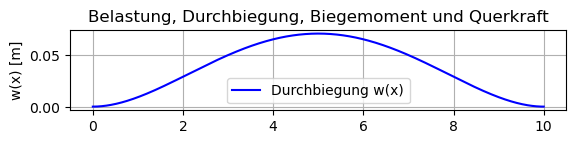

In [35]:
plt.subplot(4, 1, 1)
plt.plot(x_vals, w_vals, label='Durchbiegung w(x)', color='blue')
plt.title('Belastung, Durchbiegung, Biegemoment und Querkraft')
plt.ylabel('w(x) [m]')
plt.grid(True)
plt.legend()


Biegemoment

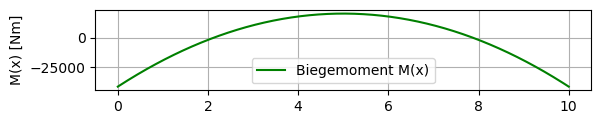

In [36]:
plt.subplot(4, 1, 2)
plt.plot(x_vals, M_vals, label='Biegemoment M(x)', color='green')
plt.ylabel('M(x) [Nm]')
plt.grid(True)
plt.legend()

Querkraft

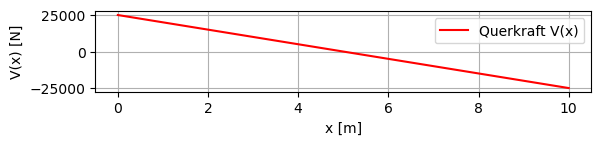

In [21]:
plt.subplot(4, 1, 3)
plt.plot(x_vals, V_vals, label='Querkraft V(x)', color='red')
plt.xlabel('x [m]')
plt.ylabel('V(x) [N]')
plt.grid(True)
plt.legend()



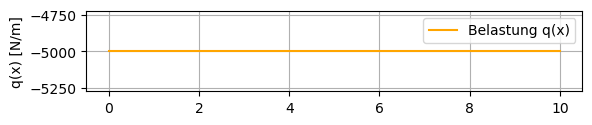

In [22]:
# Ersetze q0 immer, aber ersetze L nur, wenn es im Ausdruck enthalten ist
q_expr = q_calculated.subs({q0: q0_val})

# Überprüfen, ob L im Ausdruck enthalten ist und ersetze es nur dann
if L in q.free_symbols:
    q_expr = q_expr.subs({L: L_val})

# Lambdify mit dem angepassten Ausdruck
q_lambdified = sp.lambdify(x, q_expr, 'numpy')

# Berechne die Werte von q(x) für x_vals
q_vals = q_lambdified(x_vals)

# Wenn q_expr konstant ist (z. B. keine Abhängigkeit von x), dann erzeuge ein Array mit konstanten Werten
if isinstance(q_vals, (int, float)):
    q_vals = np.full_like(x_vals, q_vals)  # Erstelle ein Array mit konstanten Werten, das die Länge von x_vals hat

# Plotten
plt.subplot(4, 1, 4)
plt.plot(x_vals, q_vals, label='Belastung q(x)', color='orange')
plt.ylabel('q(x) [N/m]')
plt.grid(True)
plt.legend()

In [ ]:
plt.tight_layout()  # Stellt sicher, dass die Plots nicht überlappen
plt.show()  # Zeigt die Gesamtgrafik an

## Quellen
[1] Albert, Andrej (Hg.) (2014): Bautabellen für Ingenieure. Mit Berechnungshinweisen und Beispielen. Bundesanzeiger Verlag. 21. Auflage. Köln: Reguvis Fachmedien.  
[2] Herrmann, Horst; Krings, Wolfgang (2020): Kleine Baustatik. Grundlagen der Statik und Berechnung von Bauteilen. 19., berichtigte und korrigierte Auflage. Wiesbaden, Heidelberg: Springer Vieweg.  
[3] Zhang, Chuanzeng (2017):  Bestimmung der Krümmung am Einfeldträger mit Gleichlast. Arbeitsblätter. Universität Siegen, Lehrstuhl für Baustatik
